In [251]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler


In [252]:
df=pd.read_csv('data.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,0,0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,1,1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,2,2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,3,3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,4,4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [253]:
df.shape

(893, 18)

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0.1       893 non-null    int64  
 1   Unnamed: 0         893 non-null    int64  
 2   brand              893 non-null    object 
 3   name               893 non-null    object 
 4   price              893 non-null    int64  
 5   spec_rating        893 non-null    float64
 6   processor          893 non-null    object 
 7   CPU                893 non-null    object 
 8   Ram                893 non-null    object 
 9   Ram_type           893 non-null    object 
 10  ROM                893 non-null    object 
 11  ROM_type           893 non-null    object 
 12  GPU                893 non-null    object 
 13  display_size       893 non-null    float64
 14  resolution_width   893 non-null    float64
 15  resolution_height  893 non-null    float64
 16  OS                 893 non

In [255]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'brand', 'name', 'price', 'spec_rating',
       'processor', 'CPU', 'Ram', 'Ram_type', 'ROM', 'ROM_type', 'GPU',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty'],
      dtype='object')

In [256]:
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0           0
brand                0
name                 0
price                0
spec_rating          0
processor            0
CPU                  0
Ram                  0
Ram_type             0
ROM                  0
ROM_type             0
GPU                  0
display_size         0
resolution_width     0
resolution_height    0
OS                   0
warranty             0
dtype: int64

In [257]:
df.duplicated().sum()

0

In [258]:
df['brand'].value_counts()

brand
HP           186
Lenovo       169
Asus         157
Dell         107
Acer          84
MSI           65
Samsung       28
Apple         16
Infinix       15
LG             9
Xiaomi         8
Gigabyte       8
Fujitsu        6
Zebronics      4
Ultimus        4
Tecno          3
Wings          3
Chuwi          3
Realme         3
Microsoft      2
AXL            2
Huawei         2
Honor          2
Walker         1
Vaio           1
Avita          1
Primebook      1
Ninkear        1
Razer          1
iBall          1
Name: count, dtype: int64

In [259]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73.000000,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8GB,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60.000000,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8GB,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69.323529,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8GB,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66.000000,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16GB,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69.323529,Apple M1,Octa Core (4P + 4E),8GB,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [260]:
df['Ram']=df['Ram'].str.replace("GB",'')
df['Ram']=df['Ram'].astype('Int32')
df['spec_rating']=df['spec_rating'].astype(int)
df['Ram'].head()

0     8
1     8
2     8
3    16
4     8
Name: Ram, dtype: Int32

In [261]:
df['Ram'].unique()

<IntegerArray>
[8, 16, 4, 32, 2, 12, 64]
Length: 7, dtype: Int32

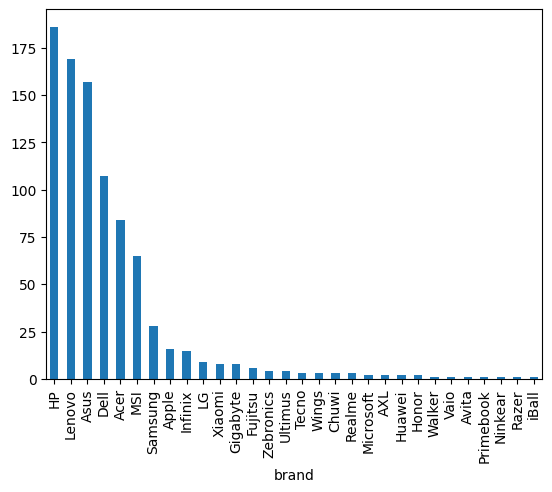

In [262]:
df['brand'].value_counts().plot(kind='bar')
plt.show()

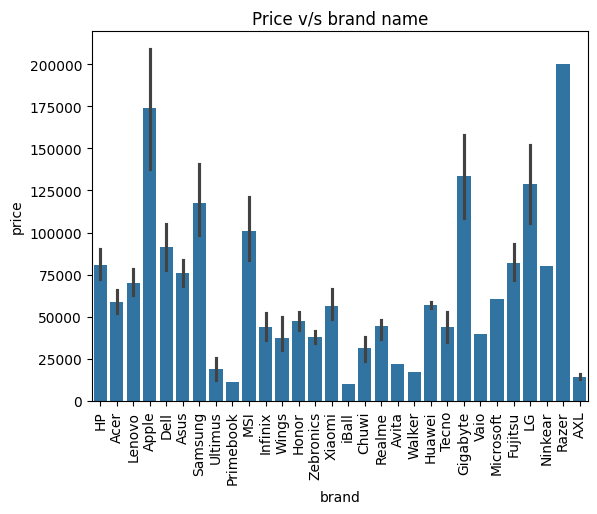

In [263]:
sns.barplot(x=df['brand'],y=df['price'])
plt.xticks(rotation=90)
plt.title("Price v/s brand name")
plt.show()

In [264]:
df['name'].value_counts()


name
Inspiron 3525 Laptop                                 4
Inspiron 3511 Laptop                                 4
Galaxy Book2 15 Laptop                               3
Megabook T1 Laptop                                   3
Vostro 3425 Laptop                                   3
                                                    ..
Victus 15-fb0136AX Gaming Laptop                     1
Zenbook 14X OLED 2023 UM5401QA-KM751WS Laptop        1
ROG Flow Z13 2023 GZ301VV-MU014WS Gaming Laptop      1
ROG Strix G16 2023 G614JI-N4151WS Gaming Laptop      1
TUF Gaming A15 2023 FA577XU-LP041WS Gaming Laptop    1
Name: count, Length: 815, dtype: int64

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


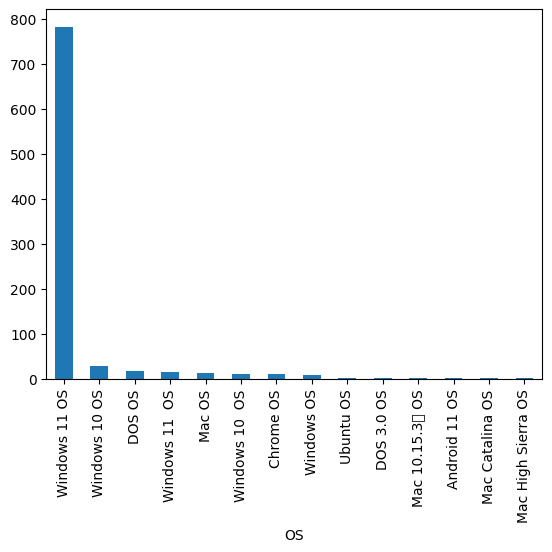

In [265]:
df['OS'].value_counts().plot(kind='bar')
plt.show()

In [266]:
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1
1,HP,15s-fq5007TU Laptop,39900,60,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1
2,Acer,One 14 Z8-415 Laptop,26990,69,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69,Apple M1,Octa Core (4P + 4E),8,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1


In [267]:
df['CPU'].value_counts()

CPU
Quad Core, 8 Threads               130
Hexa Core, 12 Threads              126
10 Cores (2P + 8E), 12 Threads     125
Octa Core, 16 Threads              102
12 Cores (4P + 8E), 16 Threads      83
Dual Core, 4 Threads                55
14 Cores (6P + 8E), 20 Threads      50
Hexa Core (2P + 4E), 8 Threads      44
Octa Core (4P + 4E), 12 Threads     43
Dual Core, 2 Threads                36
10 Cores (6P + 4E), 16 Threads      26
24 Cores (8P + 16E), 32 Threads     16
16 Cores (8P + 8E), 24 Threads      10
14 Cores (6P + 8E)                   9
5 Cores (1P + 4E), 6 Threads         7
Octa Core (4P + 4E)                  5
Quad Core, 4 Threads                 4
Octa Core, 8 Threads                 4
Octa Core                            3
10 Cores (8P + 2E)                   2
Quad Core                            2
12 Cores                             2
10 Cores, 12 Threads                 2
10 Cores                             2
24 Cores (8P + 16E)                  1
16 Cores, 32 Threads 

In [268]:
df['CPU Name']=df['CPU'].apply(lambda x:" ".join(x.split()[0:2]))
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,CPU Name
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1,"Hexa Core,"
1,HP,15s-fq5007TU Laptop,39900,60,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,Hexa Core
2,Acer,One 14 Z8-415 Laptop,26990,69,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1,"Dual Core,"
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1,12 Cores
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69,Apple M1,Octa Core (4P + 4E),8,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1,Octa Core


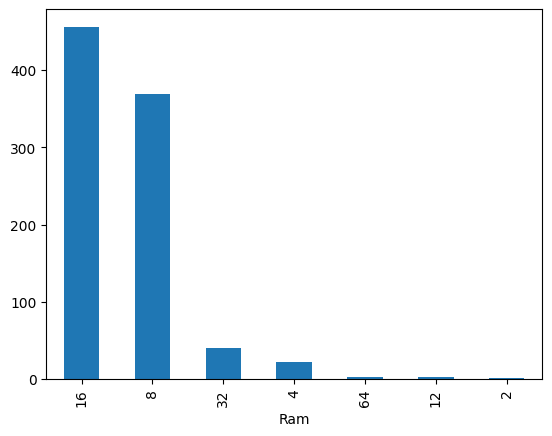

In [269]:
df['Ram'].value_counts().plot(kind='bar')
plt.show()

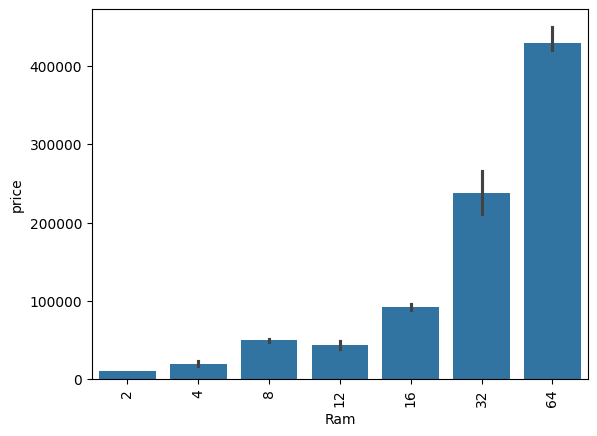

In [270]:
sns.barplot(x=df['Ram'],y=df["price"])
plt.xticks(rotation=90)
plt.show()

In [271]:
df['ROM'].value_counts()

ROM
512GB    634
1TB      188
256GB     42
128GB     12
2TB       10
64GB       5
32GB       2
Name: count, dtype: int64

In [272]:
# extract brand name from gpu
df['GPU_brand']=df['GPU'].apply(lambda x:x.split()[0])

In [273]:
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,GPU,display_size,resolution_width,resolution_height,OS,warranty,CPU Name,GPU_brand
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512GB,SSD,4GB AMD Radeon RX 6500M,15.6,1920.0,1080.0,Windows 11 OS,1,"Hexa Core,",4GB
1,HP,15s-fq5007TU Laptop,39900,60,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512GB,SSD,Intel UHD Graphics,15.6,1920.0,1080.0,Windows 11 OS,1,Hexa Core,Intel
2,Acer,One 14 Z8-415 Laptop,26990,69,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,DDR4,512GB,SSD,Intel Iris Xe Graphics,14.0,1920.0,1080.0,Windows 11 OS,1,"Dual Core,",Intel
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512GB,SSD,Intel Integrated Iris Xe,14.0,2240.0,1400.0,Windows 11 OS,1,12 Cores,Intel
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69,Apple M1,Octa Core (4P + 4E),8,DDR4,256GB,SSD,Apple M1 Integrated Graphics,13.3,2560.0,1600.0,Mac OS,1,Octa Core,Apple


In [274]:
df['GPU_brand'].value_counts()

GPU_brand
Intel         376
AMD           158
4GB           155
6GB            71
8GB            70
Integrated     24
2GB             7
12GB            7
16GB            7
16-core         3
NVIDIA          3
10-Core         3
Apple           2
GB              1
8-Core          1
30-core         1
19-core         1
ARM             1
32-core         1
Iris            1
Name: count, dtype: int64

In [275]:
df=df[df['GPU_brand']!="GB" ]
df=df[df['GPU_brand']!="8-Core" ]
df=df[df['GPU_brand']!="30-core" ]
df=df[df['GPU_brand']!="19-core" ]
df=df[df['GPU_brand']!="ARM" ]
df=df[df['GPU_brand']!="32-core" ]
df=df[df['GPU_brand']!="Iris" ]


In [276]:
df['GPU_brand'].value_counts()

GPU_brand
Intel         376
AMD           158
4GB           155
6GB            71
8GB            70
Integrated     24
16GB            7
12GB            7
2GB             7
10-Core         3
NVIDIA          3
16-core         3
Apple           2
Name: count, dtype: int64

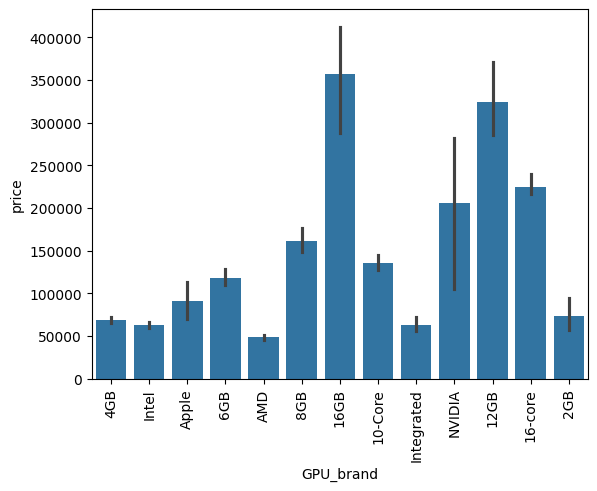

In [277]:
sns.barplot(x=df['GPU_brand'],y=df['price'])
plt.xticks(rotation=90)
plt.show()

In [278]:
df.drop(columns='GPU',inplace=True)
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,Ram_type,ROM,ROM_type,display_size,resolution_width,resolution_height,OS,warranty,CPU Name,GPU_brand
0,HP,Victus 15-fb0157AX Gaming Laptop,49900,73,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,DDR4,512GB,SSD,15.6,1920.0,1080.0,Windows 11 OS,1,"Hexa Core,",4GB
1,HP,15s-fq5007TU Laptop,39900,60,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,DDR4,512GB,SSD,15.6,1920.0,1080.0,Windows 11 OS,1,Hexa Core,Intel
2,Acer,One 14 Z8-415 Laptop,26990,69,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,DDR4,512GB,SSD,14.0,1920.0,1080.0,Windows 11 OS,1,"Dual Core,",Intel
3,Lenovo,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,LPDDR5,512GB,SSD,14.0,2240.0,1400.0,Windows 11 OS,1,12 Cores,Intel
4,Apple,MacBook Air 2020 MGND3HN Laptop,69990,69,Apple M1,Octa Core (4P + 4E),8,DDR4,256GB,SSD,13.3,2560.0,1600.0,Mac OS,1,Octa Core,Apple


In [279]:
df['Ram_type'].value_counts()

Ram_type
DDR4       496
DDR5       166
LPDDR5     145
LPDDR4X     41
LPDDR4      13
LPDDR4x     13
Unified      4
DDR3         3
LPDDR5X      2
DDR4-        1
LPDDR5x      1
DDR          1
Name: count, dtype: int64

In [280]:
df.drop(columns='Ram_type',inplace=True)

In [281]:
df['OS'].value_counts()

OS
Windows 11 OS         780
Windows 10 OS          28
DOS OS                 18
Windows 11  OS         15
Windows 10  OS         10
Chrome OS              10
Windows OS              9
Mac OS                  8
Ubuntu OS               2
DOS 3.0 OS              2
Mac 10.15.3\t OS        2
Mac Catalina OS         1
Mac High Sierra OS      1
Name: count, dtype: int64

In [282]:
def os(model):
    if model=='Windows 11 OS' or model=='Windows 10 OS' or model=='Windows OS':
        return 'Windows'
    elif model=='Mac OS' or model=='Mac 10.15.3\t OS' or model=='Mac Catalina OS' or model=='Mac High Sierra OS':
        return 'Mac'
    else:
        return 'Ubantu/DOS/Chrome'
    
    

In [283]:
df['OS']=df['OS'].apply(os)

In [284]:
brand=df['brand'].unique()

In [285]:
dt={item:i for i, item in enumerate(brand,start=1)}

In [286]:
df['ROM_type'].unique()

array(['SSD', 'Hard-Disk'], dtype=object)

In [287]:
rom_type_dict={'SSD':0,'Hard-Disk':1}

df['ROM_type']=df['ROM_type'].map(rom_type_dict)
df['ROM_type'].unique()

array([0, 1], dtype=int64)

In [288]:
dt

{'HP': 1,
 'Acer': 2,
 'Lenovo': 3,
 'Apple': 4,
 'Dell': 5,
 'Asus': 6,
 'Samsung': 7,
 'Ultimus': 8,
 'MSI': 9,
 'Infinix': 10,
 'Wings': 11,
 'Honor': 12,
 'Zebronics': 13,
 'Xiaomi': 14,
 'iBall': 15,
 'Chuwi': 16,
 'Realme': 17,
 'Avita': 18,
 'Walker': 19,
 'Huawei': 20,
 'Tecno': 21,
 'Gigabyte': 22,
 'Vaio': 23,
 'Microsoft': 24,
 'Fujitsu': 25,
 'LG': 26,
 'Ninkear': 27,
 'Razer': 28,
 'AXL': 29}

In [289]:
df['brand']=df['brand'].map(dt)

In [290]:
df['spec_rating'].unique()

array([73, 60, 69, 66, 62, 63, 64, 68, 76, 70, 71, 65, 72, 78, 77, 75, 84,
       67, 80, 82, 79, 74, 81, 83, 89, 88, 61, 85, 86])

In [291]:
df['display_size']=df['display_size'].astype(int)

In [292]:
df['display_size']

0      15
1      15
2      14
3      14
4      13
       ..
888    15
889    15
890    14
891    15
892    15
Name: display_size, Length: 886, dtype: int32

In [293]:
df['resolution_width']=df['resolution_width'].astype(int)
df['resolution_height']=df['resolution_height'].astype(int)

In [294]:
df.head()

,brand,name,price,spec_rating,processor,CPU,Ram,ROM,ROM_type,display_size,resolution_width,resolution_height,OS,warranty,CPU Name,GPU_brand
0,1,Victus 15-fb0157AX Gaming Laptop,49900,73,5th Gen AMD Ryzen 5 5600H,"Hexa Core, 12 Threads",8,512GB,0,15,1920,1080,Windows,1,"Hexa Core,",4GB
1,1,15s-fq5007TU Laptop,39900,60,12th Gen Intel Core i3 1215U,"Hexa Core (2P + 4E), 8 Threads",8,512GB,0,15,1920,1080,Windows,1,Hexa Core,Intel
2,2,One 14 Z8-415 Laptop,26990,69,11th Gen Intel Core i3 1115G4,"Dual Core, 4 Threads",8,512GB,0,14,1920,1080,Windows,1,"Dual Core,",Intel
3,3,Yoga Slim 6 14IAP8 82WU0095IN Laptop,59729,66,12th Gen Intel Core i5 1240P,"12 Cores (4P + 8E), 16 Threads",16,512GB,0,14,2240,1400,Windows,1,12 Cores,Intel
4,4,MacBook Air 2020 MGND3HN Laptop,69990,69,Apple M1,Octa Core (4P + 4E),8,256GB,0,13,2560,1600,Mac,1,Octa Core,Apple


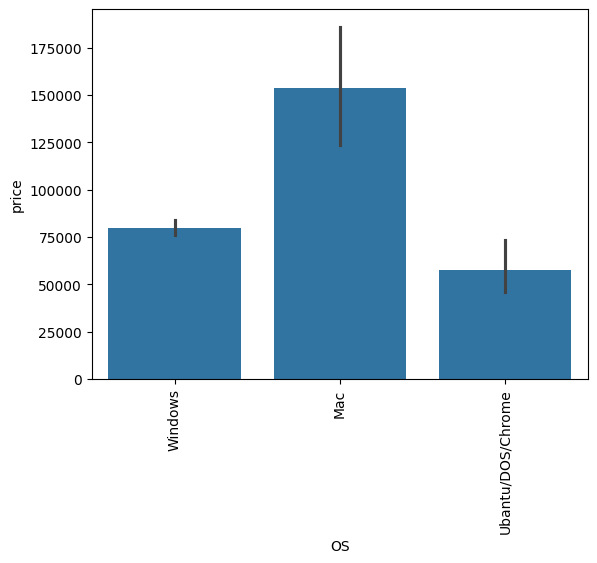

In [295]:
sns.barplot(x=df['OS'],y=df['price'])
plt.xticks(rotation=90)
plt.show()

In [296]:
df['OS'].unique()

array(['Windows', 'Mac', 'Ubantu/DOS/Chrome'], dtype=object)

In [297]:
os_dict={'Windows':1,'Mac':2,'Ubantu/DOS/Chrome':3}
df['OS']=df['OS'].map(os_dict)
df['OS'].unique()

array([1, 2, 3], dtype=int64)

In [298]:
gpu_brand=df['GPU_brand'].unique()

In [299]:
gpu_dt={item:i for i, item in enumerate(gpu_brand,start=1)}
gpu_dt

{'4GB': 1,
 'Intel': 2,
 'Apple': 3,
 '6GB': 4,
 'AMD': 5,
 '8GB': 6,
 '16GB': 7,
 '10-Core': 8,
 'Integrated': 9,
 'NVIDIA': 10,
 '12GB': 11,
 '16-core': 12,
 '2GB': 13}

In [300]:
df['GPU_brand']=df['GPU_brand'].map(gpu_dt)

In [301]:
cpu_name=df['CPU Name'].unique()
cpu_name_dt={item:i for i, item in enumerate(cpu_name,start=1)}
df['CPU Name']=df['CPU Name'].map(cpu_name_dt)

In [302]:
df['name']=df['name'].apply(lambda x:" ".join(x.split()[-2:]))

In [303]:
# name_dict={'Gaming Laptop':0,'Laptop':1}
# df['name']=df['name'].map(name_dict)


In [304]:
df['processor']=df['processor'].apply(lambda x:" ".join(x.split()[0:2]))


In [305]:
df['processor'].unique()

array(['5th Gen', '12th Gen', '11th Gen', 'Apple M1', '13th Gen',
       'Intel Celeron', '7th Gen', '3rd Gen', 'Intel Core', '6th Gen',
       '10th Gen', 'Apple M2', 'AMD Athlon', 'Intel Atom', '9th Gen',
       'AMD Ryzen', '8th Gen', 'Intel', 'Intel Pentium', 'Intel N4500',
       '4th Gen', 'intel Celeron'], dtype=object)

In [306]:
df.drop(columns=['CPU','name'],inplace=True)


In [307]:
df['warranty'].unique()

array([1, 0, 2, 3], dtype=int64)

In [308]:
df.head()

,brand,price,spec_rating,processor,Ram,ROM,ROM_type,display_size,resolution_width,resolution_height,OS,warranty,CPU Name,GPU_brand
0,1,49900,73,5th Gen,8,512GB,0,15,1920,1080,1,1,1,1
1,1,39900,60,12th Gen,8,512GB,0,15,1920,1080,1,1,2,2
2,2,26990,69,11th Gen,8,512GB,0,14,1920,1080,1,1,3,2
3,3,59729,66,12th Gen,16,512GB,0,14,2240,1400,1,1,4,2
4,4,69990,69,Apple M1,8,256GB,0,13,2560,1600,2,1,5,3


In [309]:
df['processor'].unique()

array(['5th Gen', '12th Gen', '11th Gen', 'Apple M1', '13th Gen',
       'Intel Celeron', '7th Gen', '3rd Gen', 'Intel Core', '6th Gen',
       '10th Gen', 'Apple M2', 'AMD Athlon', 'Intel Atom', '9th Gen',
       'AMD Ryzen', '8th Gen', 'Intel', 'Intel Pentium', 'Intel N4500',
       '4th Gen', 'intel Celeron'], dtype=object)

In [310]:
def process(model):
    if model=='Intel Celeron' or model=='Intel Core\Intel' or model=='Intel N4500' or model=='intel Celeron\Intel Pentium' or model=='Intel Atom':
        return 'Intel processor'
    elif model=='Apple M1' or model=='Apple M2':
        return 'Apple processor'
    else:
        return 'Gen model'

<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
<>:2: SyntaxWarning: invalid escape sequence '\I'
C:\Users\hp\AppData\Local\Temp\ipykernel_1760\270403290.py:2: SyntaxWarning: invalid escape sequence '\I'
  if model=='Intel Celeron' or model=='Intel Core\Intel' or model=='Intel N4500' or model=='intel Celeron\Intel Pentium' or model=='Intel Atom':
C:\Users\hp\AppData\Local\Temp\ipykernel_1760\270403290.py:2: SyntaxWarning: invalid escape sequence '\I'
  if model=='Intel Celeron' or model=='Intel Core\Intel' or model=='Intel N4500' or model=='intel Celeron\Intel Pentium' or model=='Intel Atom':


In [311]:
df['processor']=df['processor'].apply(process)

In [312]:
df['processor'].unique()

array(['Gen model', 'Apple processor', 'Intel processor'], dtype=object)

In [313]:
processor_dict={'Gen model':1,'Apple processor':2,'Intel processor':3}
df['processor']=df['processor'].map(processor_dict)

In [314]:
df['ROM'].unique()

array(['512GB', '256GB', '128GB', '1TB', '32GB', '2TB', '64GB'],
      dtype=object)

In [315]:
df['ROM'] = df['ROM'].apply(lambda x: x[:-2] if len(x) > 2 else x)

In [316]:
df.head()

,brand,price,spec_rating,processor,Ram,ROM,ROM_type,display_size,resolution_width,resolution_height,OS,warranty,CPU Name,GPU_brand
0,1,49900,73,1,8,512,0,15,1920,1080,1,1,1,1
1,1,39900,60,1,8,512,0,15,1920,1080,1,1,2,2
2,2,26990,69,1,8,512,0,14,1920,1080,1,1,3,2
3,3,59729,66,1,16,512,0,14,2240,1400,1,1,4,2
4,4,69990,69,2,8,256,0,13,2560,1600,2,1,5,3


In [317]:
x=df.drop(columns=['price'])
y=df[['price']]

In [318]:
x.head()

,brand,spec_rating,processor,Ram,ROM,ROM_type,display_size,resolution_width,resolution_height,OS,warranty,CPU Name,GPU_brand
0,1,73,1,8,512,0,15,1920,1080,1,1,1,1
1,1,60,1,8,512,0,15,1920,1080,1,1,2,2
2,2,69,1,8,512,0,14,1920,1080,1,1,3,2
3,3,66,1,16,512,0,14,2240,1400,1,1,4,2
4,4,69,2,8,256,0,13,2560,1600,2,1,5,3


In [319]:
df.columns.nunique()

14

In [320]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [321]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [322]:
linear=LinearRegression()
dt=DecisionTreeRegressor()
rd=RandomForestRegressor()




In [323]:
linear.fit(x_train,y_train)

LinearRegression()

In [324]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [325]:
rd.fit(x_train,y_train)

c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor()

In [326]:
print("Trainning score",round(rd.score(x_train,y_train)*100,2))
print("Testing score",round(rd.score(x_test,y_test['price'])*100,2))

Trainning score 97.13
Testing score 84.81


In [327]:
print("Trainning score",round(dt.score(x_train,y_train)*100,2))
print("Testing score",round(dt.score(x_test,y_test['price'])*100,2))

Trainning score 99.86
Testing score 70.71


In [328]:
import joblib,os

In [329]:
os.makedirs("models",exist_ok=True)
joblib.dump(dt,'./models/decisiontree.lb')
joblib.dump(rd,'./models/randomforest.lb')

['./models/randomforest.lb']

In [330]:
x_train.columns

Index(['brand', 'spec_rating', 'processor', 'Ram', 'ROM', 'ROM_type',
       'display_size', 'resolution_width', 'resolution_height', 'OS',
       'warranty', 'CPU Name', 'GPU_brand'],
      dtype='object')

In [331]:
# print("linear training score:",round(linear.score(x_train,y_train)*100,2))
# print("linear testing score",round(linear.score(x_test,y_test)*100,2))
# print("dtr training score:",round(dt.score(x_train,y_train)*100,2))
# print("dtr testing score",round(dt.score(x_test,y_test)*100,2))
# print("rnd training score:",round(rd.score(x_train,y_train)*100,2))
# print("rnd testing score",round(rd.score(x_test,y_test)*100,2))